#### Binomial distribution

    1)CDF - cumulative binomial probability of obtaining x or fewer 'events' in the specified number of trials and probability of success for each trial.
    CDFBinomial(5,10,0.5) = 0.623


    2)PDF - binomial probability of obtaining exactly x 'events' in the specified number of trials and probability of success for each trial.
    PDFBinomial(5,10,0.5) = 0.246

In [1]:
import pandas as pd
#bias-coin [1110]
df = pd.read_csv('your_dataset_bias.csv')

#balanced-coin [1010]
#df = pd.read_csv('your_dataset_balanced.csv')

# Assuming 'outcome' is a column in your dataset representing the discrete outcomes
outcome_column = 'success'  # Replace with your actual column name

In [2]:
df[outcome_column].value_counts()

1    12
0     4
Name: success, dtype: int64

In [3]:
df[outcome_column].value_counts(normalize=True)

1    0.75
0    0.25
Name: success, dtype: float64

In [4]:
# Calculate the empirical PMF
pmf = df[outcome_column].value_counts(normalize=True).sort_index()

In [5]:
# Display the PMF
print('Empirical PMF:')
print(pmf)

Empirical PMF:
0    0.25
1    0.75
Name: success, dtype: float64


In [6]:
p_zero,p_one=pmf
number_of_rows=df[outcome_column].shape[0]

In [7]:
print('p_one :',p_one)
print('number_of_rows :',number_of_rows)

p_one : 0.75
number_of_rows : 16


In [8]:
from scipy.stats import binom 
import matplotlib.pyplot as plt

n = number_of_rows
p = p_one

r_values = list(range(n + 1)) 

# obtaining the mean and variance  
mean, var, skew, kurt = binom.stats(n, p,moments='mvsk')
std=binom.std(n, p, loc=0)
# list of pmf values 

 
# printing the table
print("-------"*10)
print(f"r_values: {r_values}")
print(f"Probability of success: {p} , Number of experiments:{n}")
print(f"Mean: {mean} , Variance:{var},StandardDeviation:{std}, skew:{skew}, kurt:{kurt}")

print("-------"*10) 
print("r\tp(r)") 
print("-------"*10)
dist = [binom.pmf(r, n, p) for r in r_values ]
for i in range(n + 1): 
    print(str(r_values[i]) + "\t" + str(dist[i])) 
# printing mean and variance 




----------------------------------------------------------------------
r_values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Probability of success: 0.75 , Number of experiments:16
Mean: 12.0 , Variance:3.0,StandardDeviation:1.7320508075688772, skew:-0.2886751345948129, kurt:-0.041666666666666664
----------------------------------------------------------------------
r	p(r)
----------------------------------------------------------------------
0	2.3283064365386924e-10
1	1.1175870895385754e-08
2	2.514570951461795e-07
3	3.520399332046512e-06
4	3.432389348745343e-05
5	0.00024713203310966513
6	0.0013592261821031555
7	0.005825255066156388
8	0.019660235848277786
9	0.05242729559540746
10	0.11009732075035578
11	0.18015925213694575
12	0.22519906517118224
13	0.20787606015801421
14	0.1336346101015806
15	0.0534538440406323
16	0.010022595757618546


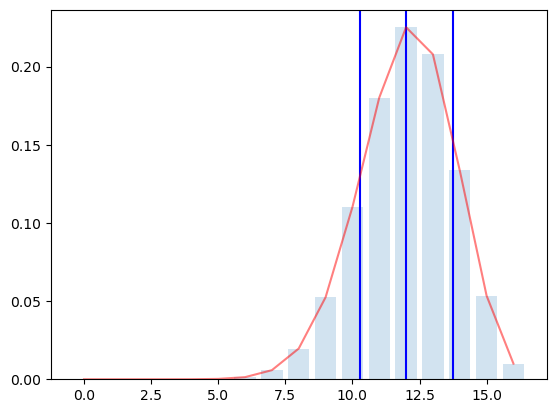

In [56]:
# plotting the graph
plt.axvline(x = mean, color = 'b', label = 'mean')
plt.axvline(x = mean+std, color = 'b', label = 'std')
plt.axvline(x = mean-std, color = 'b', label = 'std')
plt.bar(r_values, dist,alpha=0.2) 
plt.plot(r_values, dist,color = 'r',alpha=0.5) 
plt.show()

Probability of success: 0.75 , Number of experiments:16


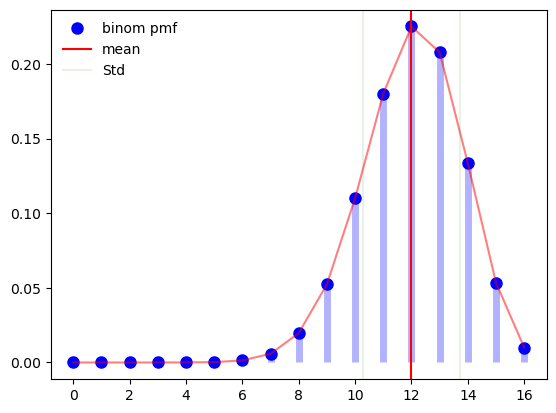

In [57]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

##convert to array
x=np.array(r_values)

#plot dots [x=x-axis, y=distribution]
ax.plot(x, dist, 'bo', ms=8, label='binom pmf')

#plot bars
ax.vlines(x, 0,dist, colors='b', lw=5, alpha=0.3)

#plot line
plt.plot(x, dist,color = 'r',alpha=0.5) 

#plot mean, std
plt.axvline(x = mean, color = 'r',label = 'mean')
plt.axvline(x = mean+std, color = 'g',label = 'Std',alpha=0.1)
plt.axvline(x = mean-std, color = 'g',alpha=0.1)


print(f"Probability of success: {p} , Number of experiments:{n}")
ax.legend(loc='best', frameon=False)



plt.show()

In [58]:
print(f"Probability of success: {p} , Number of experiments:{n}")

Probability of success: 0.75 , Number of experiments:16


In [59]:
print(f"Arranged array [ Size:{x.shape}  positions:{x} ]")

Arranged array [ Size:(17,)  positions:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] ]


In [60]:
cdf_prob = binom.cdf(x, n, p)
print(f"Prob:{cdf_prob} ")

Prob:[2.32830644e-10 1.14087015e-08 2.62865797e-07 3.78326513e-06
 3.81071586e-05 2.85239192e-04 1.64446537e-03 7.46972044e-03
 2.71299563e-02 7.95572519e-02 1.89654573e-01 3.69813825e-01
 5.95012890e-01 8.02888950e-01 9.36523560e-01 9.89977404e-01
 1.00000000e+00] 


In [61]:
np.allclose(x, binom.ppf(cdf_prob, n, p))

True

In [62]:
import numpy as np
import matplotlib.pyplot as plt

Probability of success: 0.75 , Number of experiments:16
Mean: 12.0, Standard-deviation:1.7320508075688772, skew:-0.2886751345948129, kurt:-0.041666666666666664


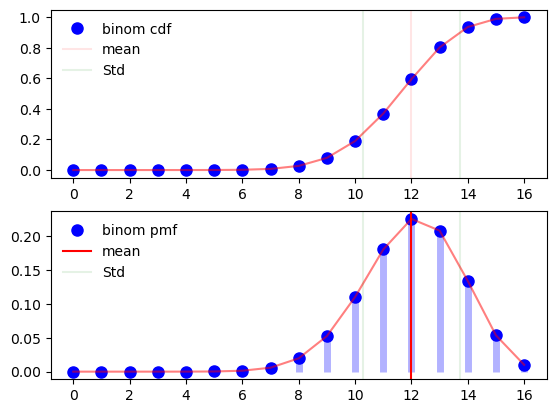

In [66]:
fig,ax=plt.subplots(2)
##convert to array
x=np.array(r_values)
#plot dots [x=x-axis, y=distribution]
ax[0].plot(x, cdf_prob, 'bo', ms=8, label='binom cdf')
#plot line
ax[0].plot(x, cdf_prob,color = 'r',alpha=0.5)
ax[0].axvline(x = mean, color = 'r',label = 'mean',alpha=0.1)
ax[0].axvline(x = mean+std, color = 'g',label = 'Std',alpha=0.1)
ax[0].axvline(x = mean-std, color = 'g',alpha=0.1)
ax[0].legend(loc='best', frameon=False)

#plot dots [x=x-axis, y=distribution]
ax[1].plot(x, dist, 'bo', ms=8, label='binom pmf')
#plot bars
ax[1].vlines(x, 0,dist, colors='b', lw=5, alpha=0.3)
#plot line
ax[1].plot(x, dist,color = 'r',alpha=0.5) 
#plot mean, std
ax[1].axvline(x = mean, color = 'r',label = 'mean')
ax[1].axvline(x = mean+std, color = 'g',label = 'Std',alpha=0.1)
ax[1].axvline(x = mean-std, color = 'g',alpha=0.1)


print(f"Probability of success: {p} , Number of experiments:{n}")
print(f"Mean: {mean}, Standard-deviation:{std}, skew:{skew}, kurt:{kurt}")
ax[1].legend(loc='best', frameon=False)
plt.show()